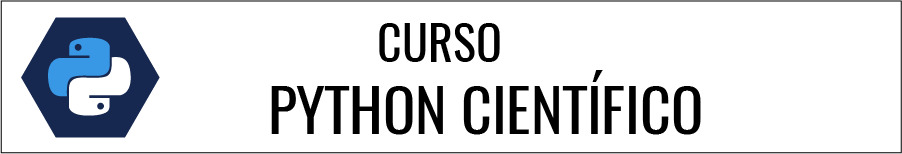

#  Interpolacion de datos

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from scipy.interpolate import interp1d

### scipy.interpolate.interp1d
```python
class scipy.interpolate.interp1d(x, y, kind='linear', axis=- 1, copy=True, bounds_error=None, fill_value=nan, assume_sorted=False)
```

https://docs.scipy.org/doc/scipy/reference/interpolate.html

In [3]:
x_data = np.array([-1., 0, 2, 3, 5, 6, 7])
y_data = np.array([ 1., 3, 4, 3, 2, 2, 1])

In [23]:
xp = np.linspace(min(x_data),max(x_data))

In [22]:
f1 = interp1d(x_data, y_data, kind='nearest')
f2 = interp1d(x_data, y_data, kind='nearest-up')
f3 = interp1d(x_data, y_data, kind='linear')
f4 = interp1d(x_data, y_data, kind='zero')
f5 = interp1d(x_data, y_data, kind='slinear')
f6 = interp1d(x_data, y_data, kind='quadratic')
f7 = interp1d(x_data, y_data, kind='cubic')

kindstr or int, optional

    Specifies the kind of interpolation as a string or as an integer specifying the order of the spline interpolator to use.  
    The string has to be one of ‘linear’, ‘nearest’, ‘nearest-up’, ‘zero’, ‘slinear’, ‘quadratic’, ‘cubic’, ‘previous’, or ‘next’.  
    ‘zero’, ‘slinear’, ‘quadratic’ and ‘cubic’ refer to a spline interpolation of zeroth, first, second or third order; ‘previous’ and ‘next’ simply return the previous or next value of the point; ‘nearest-up’ and ‘nearest’ differ when interpolating half-integers (e.g. 0.5, 1.5) in that ‘nearest-up’ rounds up and ‘nearest’ rounds down. Default is ‘linear’.

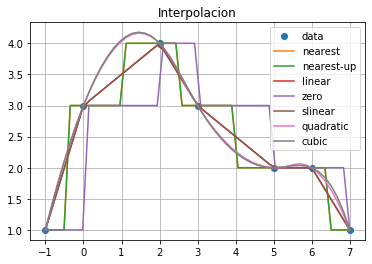

In [24]:
#plt.figure()
plt.plot(x_data, y_data, 'o')
plt.plot(xp, f1(xp), '-')
plt.plot(xp, f2(xp), '-')
plt.plot(xp, f3(xp), '-')
plt.plot(xp, f4(xp), '-')
plt.plot(xp, f5(xp), '-')
plt.plot(xp, f6(xp), '-')
plt.plot(xp, f7(xp), '-')
plt.title('Interpolacion')
plt.legend(['data', 'nearest', 'nearest-up','linear', 'zero', 'slinear', 'quadratic', 'cubic'], loc = 0)
plt.grid(True)
plt.show()

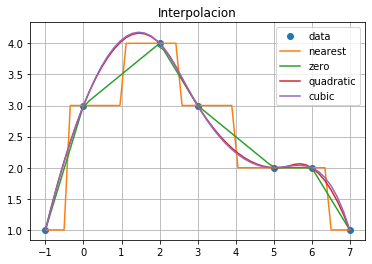

In [25]:
plt.plot(x_data, y_data, 'o')
plt.plot(xp, f1(xp), '-')
plt.plot(xp, f5(xp), '-')
plt.plot(xp, f6(xp), '-')
plt.plot(xp, f7(xp), '-')
plt.title('Interpolacion')
plt.legend(['data', 'nearest', 'zero', 'quadratic', 'cubic'], loc = 0)
plt.grid(True)
plt.show()

## Extrapolación de datos

**fill_valuearray-like or (array-like, array_like) or “extrapolate”, optional**  

In [33]:
x_data_2 = np.arange(0,10)
y_data_2 = np.exp(-x_data_2/3.0)
f = interp1d(x_data_2, y_data_2, kind='cubic', fill_value='extrapolate')
t = np.arange(-5,15)
print( f(9))
print( f(11))
x_prob = -1.0
print( f(x_prob))
print(np.exp(-((x_prob)/3.0)))

0.049787068367863944
0.02238936052296514
1.3880525612967187
1.3956124250860895


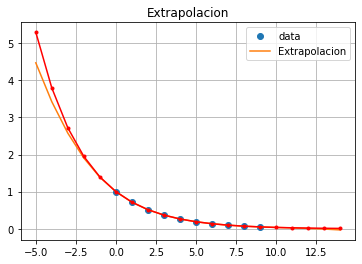

In [35]:
plt.plot(x_data_2, y_data_2, 'o')
plt.plot(t, f(t), '-')
plt.plot(t, np.exp(-(t/3.0)), '.-r')
plt.title('Extrapolacion')
plt.legend(['data', 'Extrapolacion'])
plt.grid(True)
plt.show()

## Interpolación 2D

In [36]:
from scipy.interpolate import interp2d

---------------------------------------------------------------------
```python
class scipy.interpolate.interp2d(x, y, z, kind='linear', copy=True, bounds_error=False, fill_value=None)
```
------------------------------------------------------------------------

In [37]:
x2d = np.arange(-5.01, 5.01, 0.25)
y2d = np.arange(-5.01, 5.01, 0.25)
xx, yy = np.meshgrid(x2d, y2d)

z2d = np.sin(xx**2+yy**3)

f2d = interp2d(x2d, y2d, z2d, kind='cubic')

In [39]:
xnew = np.arange(-5.01, 5.01, 1e-2)
ynew = np.arange(-5.01, 5.01, 1e-2)
znew = f2d(xnew, ynew)

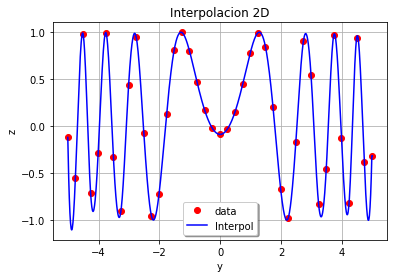

In [46]:
plt.plot(x2d, z2d[0, :], 'ro', xnew, znew[0, :], 'b-')
#plt.plot(y2d, z2d[:, 0], 'ro', ynew, znew[:, 0], 'b-')
#plt.plot(y2d, z2d[:, 0], 'ko', ynew, znew[:, 0], 'g-')
plt.xlabel('y')
plt.ylabel('z')
plt.legend(['data','Interpol'], shadow=True, loc=8)
plt.title('Interpolacion 2D')
plt.grid()
plt.show()


## Interpolación por Cubic Spline

scipy.interpolate.CubicSpline
`class scipy.interpolate.CubicSpline(x, y, axis=0, bc_type='not-a-knot', extrapolate=None`

Cubic spline data interpolator.

Interpolate data with a piecewise cubic polynomial which is twice continuously differentiable [1]. The result is represented as a PPoly instance with breakpoints matching the given data.

In [14]:
from scipy.interpolate import CubicSpline
#import matplotlib.pyplot as plt

En este ejemplo, la spline cúbica se usa para interpolar una sinusoide muestreada. Puede ver que la propiedad de continuidad de spline se cumple para la primera y segundas derivadas y viola sólo para la tercera derivada. 

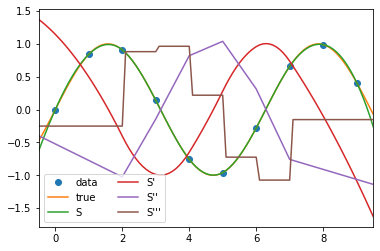

In [47]:
x = np.arange(10)
y = np.sin(x)
cs = CubicSpline(x, y)
xs = np.arange(-0.5, 9.6, 0.1)

#fig, ax = plt.subplots(figsize=(6.5, 4))
plt.plot(x, y, 'o', label='data')
plt.plot(xs, np.sin(xs), label='true')
plt.plot(xs, cs(xs), label="S")
plt.plot(xs, cs(xs, 1), label="S'")
plt.plot(xs, cs(xs, 2), label="S''")
plt.plot(xs, cs(xs, 3), label="S'''")
plt.xlim(-0.5, 9.5)
plt.legend(loc='lower left', ncol=2)
plt.show()

En el segundo ejemplo, el círculo unitario se interpola con una spline. Se utiliza una condición de frontera periódica. Puedes ver que la primera derivada valores, **ds/dx=0, ds/dy=1** en el punto periódico (1, 0) son correctos calculado Tenga en cuenta que un círculo no puede ser representado exactamente por un cubic spline. Para aumentar la precisión, se requerirían más puntos de corte. 

ds/dx=0.0 ds/dy=1.0


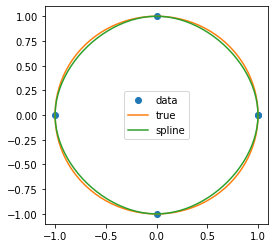

In [52]:
theta = 2 * np.pi * np.linspace(0, 1, 5)
#theta = 2 * np.pi * np.linspace(0, 1, 9)
y = np.c_[np.cos(theta), np.sin(theta)]
cs = CubicSpline(theta, y, bc_type='periodic')
print("ds/dx={:.1f} ds/dy={:.1f}".format(cs(0, 1)[0], cs(0, 1)[1]))#ds/dx=0.0 ds/dy=1.0
xs = 2 * np.pi * np.linspace(0, 1, 100)
plt.subplots(figsize=(4, 4))

plt.plot(y[:, 0], y[:, 1], 'o', label='data')

plt.plot(np.cos(xs), np.sin(xs), label='true')

plt.plot(cs(xs)[:, 0], cs(xs)[:, 1], label='spline')

plt.legend(loc='center')

plt.show()


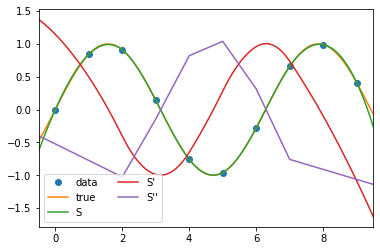

In [55]:
x = np.arange(10)
y = np.sin(x)
cs = CubicSpline(x, y)
xs = np.arange(-0.5, 9.6, 0.1)
csd1=cs.derivative(nu=1)(xs)
csd2=cs.derivative(nu=2)(xs)
#fig, ax = plt.subplots(figsize=(6.5, 4))
plt.plot(x, y, 'o', label='data')
plt.plot(xs, np.sin(xs), label='true')
plt.plot(xs, cs(xs), label="S")
plt.plot(xs, csd1, label="S'")
plt.plot(xs, csd2, label="S''")
plt.xlim(-0.5, 9.5)
plt.legend(loc='lower left', ncol=2)
plt.show()

In [58]:
print(cs(np.pi/3))
print(np.sin(np.pi/3))

0.8640384230913423
0.8660254037844386


In [59]:
# Antiderivamos
x = np.arange(10)
y = np.sin(x)
cs = CubicSpline(x, y)
print(cs.integrate(0,10))

1.6221775607453985


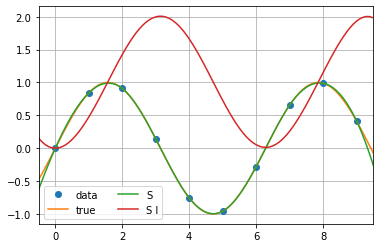

In [65]:
x = np.arange(10)
y = np.sin(x)
cs = CubicSpline(x, y)
xs = np.arange(-0.5, 9.6, 0.1)
csI=cs.antiderivative(nu=1)
csd2=cs.derivative(nu=2)(xs)
#fig, ax = plt.subplots(figsize=(6.5, 4))
plt.plot(x, y, 'o', label='data')
plt.plot(xs, np.sin(xs), label='true')
plt.plot(xs, cs(xs), label="S")
plt.plot(xs, csI(xs), label="S I")
plt.xlim(-0.5, 9.5)
plt.legend(loc='lower left', ncol=2)
plt.grid()
plt.show()

In [20]:
# Integrate, integración valuada en un rango
x = np.arange(10)
y = np.sin(x)
cs = CubicSpline(x, y)
xs = np.arange(-0.5, 9.6, 0.1)
I=cs.integrate(0,10)
print(I)

1.6221775607453985


In [66]:
# calculamos las raices
x = np.arange(10)
y = np.sin(x)
cs = CubicSpline(x, y)
print(cs.roots())

[-9.21198873  0.          3.14201295  6.28284292  9.32727171]
